# Data cleaning

### Dataset1: 202006-citibike-tripdata.csv
#### new columns:

* **star_hour**: the hour of the day
* **start_weekday**: the day of the week 
* **is_weekend**: boolean value if the day is weekend
* **part_of_day**: groupby 'start_hour': 
    - 'early morning': 0:00 - 3:59
    - 'morning': 4:00 - 9:59
    - 'noon': 10:00 - 13:59
    - 'afternoon': 14:00 - 17:59
    - 'evening': 18:00 - 23:59 
* **is_roundtrip**: boolean value of the bike start and stop at the same station
* **trip_pattern**:  string of start station id and end station id (ie. '517-2343')
* **trip_pattern_pair**: trip_pattern but regardless of the direction (ie. both 517-2343 and 2343-517 are assigned as '2343-517') 
* **distance**: the point to point distance in kilometer between start station and end station. Calculated by latitude and longtitude.
* **age**: 2020 - birth_year

#### drop rows:
##### Outlinears
* 1% highest age
* 10% longest trip duration
##### Missing Vaules
* birth year = 1969
* gender = 0

1524940 rows remain

### Dataset 2: 100-top-station-pairs.csv

* drop all the roundtrips
* keep only the 100 most popular station pairs

33026 remains

### Dataset 3: 200-top-trip-patterns.csv

* drop all the roundtrips
* keep only the 100 most popular trip patterns

33369 rows remains

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("202006-citibike-tripdata.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882273 entries, 0 to 1882272
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tripduration             int64  
 1   starttime                object 
 2   stoptime                 object 
 3   start station id         int64  
 4   start station name       object 
 5   start station latitude   float64
 6   start station longitude  float64
 7   end station id           int64  
 8   end station name         object 
 9   end station latitude     float64
 10  end station longitude    float64
 11  bikeid                   int64  
 12  usertype                 object 
 13  birth year               int64  
 14  gender                   int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 215.4+ MB


In [3]:
df.isna().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

(array([2.30000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 2.00000e+00, 1.00000e+01, 3.00000e+00, 1.60000e+01,
        5.30000e+01, 2.00000e+01, 5.30000e+01, 7.00000e+00, 2.00000e+00,
        2.90000e+01, 0.00000e+00, 3.00000e+00, 2.80000e+01, 6.20000e+01,
        8.00000e+00, 2.00000e+01, 4.13000e+02, 8.60000e+01, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 3.00000e+00, 0.00000e+00, 6.00000e+00,
        0.00000e+00, 5.00000e+00, 4.00000e+00, 1.00000e+01, 5.20000e+01,
        1.50000e+01, 0.00000e+00, 3.00000e+00, 1.20000e+01, 4.30000e+01,
        6.40000e+01, 3.90000e+01, 7.00000e+00, 5.00000e+00, 3.70000e+01,
        7.00000e+00, 7.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        7.10000e+01, 3.00000e+00, 7.50000e+01, 3.20000e+01, 5.10000e+01,
        4.80000e+01, 8.00000e+01, 1.26000e+02, 4.80000e+01, 2.58000e+02,
        6.27000e+02, 8.70000e+01, 4.14000e+02, 5.65

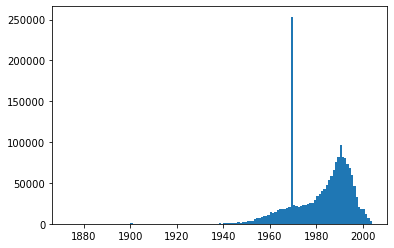

In [4]:
import matplotlib.pyplot as plt

plt.hist(x=df['birth year'],bins=df['birth year'].max()-df['birth year'].min())

In [5]:
df['birth year'].mode()

0    1969
dtype: int64

Notes: 1969 is the defualt setting for birth year. so users who skip the input will be assigned as 1969.
Question: should we drop it as missing value because the user don't put their real birth year?

In [6]:
# missing value
# gender 0 means  'unknown'. I treat it as missing vaule too. 
df.drop(df[df['gender']==0].index , inplace=True)
df.drop(df[df['birth year']==1969].index , inplace=True)

In [7]:
df.replace([np.inf, -np.inf], np.nan)
df.dropna(inplace=True)

## check outliners

In [8]:
df.describe().round(2)

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,1611415.00,1611415.00,1611415.00,1611415.00,1611415.00,1611415.00,1611415.00,1611415.00,1611415.00,1611415.00
mean,1420.31,2055.29,40.74,-73.98,2049.11,40.74,-73.98,34081.02,1983.36,1.36
std,10001.99,1529.84,0.04,0.02,1531.28,0.04,0.02,8677.43,12.01,0.48
min,61.00,72.00,40.66,-74.02,72.00,40.66,-74.07,14529.00,1873.00,1.00
25%,515.00,426.00,40.72,-73.99,422.00,40.72,-73.99,28874.00,1977.00,1.00
50%,974.00,3096.00,40.74,-73.98,3093.00,40.74,-73.98,36987.00,1987.00,1.00
75%,1651.00,3453.00,40.77,-73.96,3453.00,40.76,-73.96,41096.00,1992.00,2.00
max,2818914.00,4038.00,40.84,-73.90,4038.00,40.84,-73.90,44542.00,2004.00,2.00


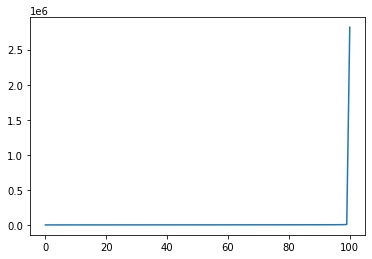

In [9]:
td_quantile=[]
for i in range(0, 101):
    td_quantile.append(df['tripduration'].quantile(i/100))

plt.plot(range(0, 101), td_quantile)

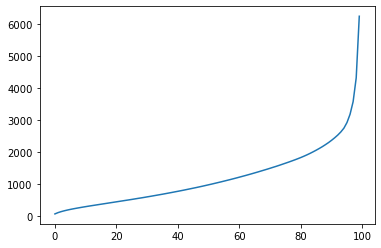

In [10]:
# show 0-99 percentile to get rid of the extra large outliner
plt.plot(range(0, 100), td_quantile[:100])

In [11]:
df.drop(df[df['tripduration']>2490].index , inplace=True)

In [12]:
df['tripduration'].quantile(.90)

1930.0

In [13]:
df['age'] = 2020 - df['birth year']

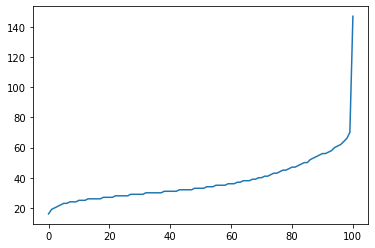

In [14]:
age_quantile=[]
for i in range(0, 101):
    age_quantile.append(df['age'].quantile(i/100))

import matplotlib.pyplot as plt

plt.plot(range(0, 101), age_quantile)

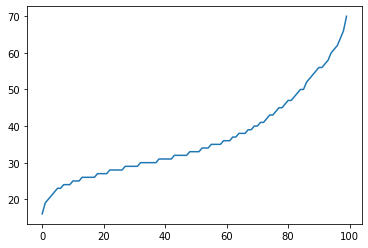

In [15]:
# show 0-99 percentile to get rid of the extra large outliner
plt.plot(range(0, 100), age_quantile[:100])

In [16]:
df['age'].quantile(.99)

70.0

In [17]:
# remove outliners 
df.drop(df[df['age']>69].index , inplace=True)


In [18]:
df.shape

(1459242, 16)

## Add new features

In [19]:
df['start_weekday'] = pd.to_datetime(df['starttime']).dt.weekday


In [20]:
df['is_weekend'] = df['start_weekday'].apply(lambda d: d==5 or d==6)

In [21]:
df['start_hour'] = pd.to_datetime(df['starttime']).dt.hour

In [22]:
def extract_part_of_day(hour):
    if hour < 4:
        return 'early morning'
    if hour < 10:
        return 'morning'
    if hour < 14:
        return 'noon'
    if hour < 18:
        return 'afternoon'
    return 'evening'
df['part_of_day'] = df['start_hour'].apply(lambda t: extract_part_of_day(t))

In [23]:
df['is_roundtrip'] = df['start station id'] == df['end station id']

In [24]:
df['trip_pattern'] = df['start station id'].astype(str) + '-' + df['end station id'].astype(str)

In [25]:
df['trip_pattern_pair'] = np.where(df['start station id'] > df['end station id'], df['start station id'].astype(str) + '-' + df['end station id'].astype(str), df['end station id'].astype(str) + '-' + df['start station id'].astype(str))

In [26]:
# dist = 6371.01 * acos(sin(slat)*sin(elat) + cos(slat)*cos(elat)*cos(slon - elon))

df['distance'] = 6371.01 * np.arccos(
    np.sin(np.radians(df['start station latitude'])) * np.sin(np.radians(df['end station latitude'])) + np.cos(np.radians(df['start station latitude'])) * np.cos(np.radians(df['end station latitude'])) * np.cos(np.radians(df['start station longitude']) - np.radians(df['end station longitude']))
    )

In [27]:
df[['start station longitude','start station latitude','end station longitude','end station latitude','distance']].head()

,start station longitude,start station latitude,end station longitude,end station latitude,distance
0,-73.981540,40.679279,-73.981540,40.679279,0.000000
2,-73.965251,40.710446,-73.959608,40.676520,3.802252
4,-73.970694,40.758281,-73.990093,40.737050,2.871175
5,-74.007718,40.721854,-74.004831,40.735354,1.520738
7,-73.990753,40.729515,-73.992390,40.737262,0.872390


## Create dummies for gender and usertype

In [28]:
df['gender_Male'] = df['gender']==1
df['usertype_Subscriber'] = df['usertype']=='Subscriber'
df = df.drop(labels=['gender', 'usertype'], axis=1)

In [29]:
df.to_csv('202006-citibike-tripdata-clean.csv')

In [30]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'birth year',
       'age', 'start_weekday', 'is_weekend', 'start_hour', 'part_of_day',
       'is_roundtrip', 'trip_pattern', 'trip_pattern_pair', 'distance',
       'gender_Male', 'usertype_Subscriber'],
      dtype='object')

# Dataset 2: top trip pattern pairs

In [31]:
oneway = df[df['is_roundtrip'] == 0]
oneway = oneway.drop(labels=['is_roundtrip'], axis=1)



In [32]:
trip_count = oneway['trip_pattern_pair'].value_counts()
top_pairs = trip_count.head(100)
top_pairs

514-426      959
3256-514     919
3142-3141    839
3992-3881    583
3906-514     579
            ... 
514-478      227
3141-3134    223
470-459      222
3374-3165    221
2006-281     220
Name: trip_pattern_pair, Length: 100, dtype: int64

In [33]:
top_pairs_li = top_pairs.index.tolist()
topairs = oneway[oneway['trip_pattern_pair'].isin(top_pairs_li)]
topairs.shape

(32220, 23)

In [34]:
topairs.to_csv('100-top-station-pairs.csv')

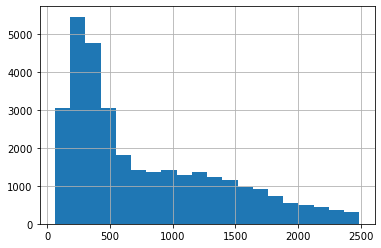

In [35]:
topairs['tripduration'].hist(bins=20)

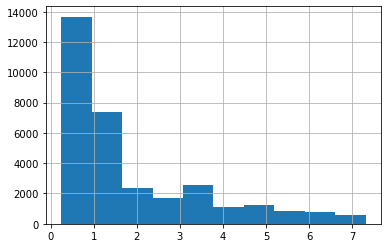

In [40]:
topairs['distance'].hist()

# Dataset 3: top trips pattern


In [37]:
trip_count = oneway['trip_pattern'].value_counts()
top_trips = trip_count.head(200)
top_trips

514-426      556
3142-3141    547
514-3256     492
3256-514     427
426-514      403
            ... 
2006-281     116
3993-426     116
462-509      116
532-401      116
514-363      115
Name: trip_pattern, Length: 200, dtype: int64

In [38]:
top_trips_li = top_trips.index.tolist()
top_trips = oneway[oneway['trip_pattern'].isin(top_trips_li)]
top_trips.shape

(33369, 23)

In [39]:
top_trips.to_csv('200-top-trip-patterns.csv')